In [48]:
## Data Visualization: Level 1

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df= pd.read_csv('Dataset .csv')
display(df.head())


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [50]:
# Perform Text Cleaning on this dataset
!pip install clean_text



In [51]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [52]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')


# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    """Cleans the input text by converting to lowercase, removing special characters and numbers."""
    # Ensure the input is a string
    text = str(text)
    # 1. Lowercase
    text = text.lower()

    # 2. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 3. Remove numbers
    text = re.sub(r'\d+', '', text)

    # 4. Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # 5. Tokenize and remove stopwords
    words = text.split()
    words = [w for w in words if w not in stop_words]

    # 6. Lemmatization
    words = [lemmatizer.lemmatize(w) for w in words]

    # 7. Simple stammerization removal (remove repeated characters)
    words = [re.sub(r'(.)\1+', r'\1', w) for w in words]


    return " ".join(words)

# Apply the clean_text function to the 'Restaurant Name' column
df['Cleaned_Restaurant Name'] = df['Restaurant Name'].apply(clean_text)

# Display the first few rows with the new column
display(df[['Restaurant Name', 'Cleaned_Restaurant Name']].head(10))

# Apply the clean_text function to the 'Cuisines' column
df['Cleaned_Cuisines'] = df['Cuisines'].apply(clean_text)

# Display the first few rows with the new column
display(df[['Cuisines', 'Cleaned_Cuisines']].head(10))\

# Apply the clean_text function to the 'City' column
df['Cleaned_City'] = df['City'].apply(clean_text)

# Display the first few rows with the new column
display(df[['City', 'Cleaned_City']].head(10))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Restaurant Name,Cleaned_Restaurant Name
0,Le Petit Souffle,le petit soufle
1,Izakaya Kikufuji,izakaya kikufuji
2,Heat - Edsa Shangri-La,heat edsa shangrila
3,Ooma,oma
4,Sambo Kojin,sambo kojin
5,Din Tai Fung,din tai fung
6,Buffet 101,bufet
7,Vikings,viking
8,Spiral - Sofitel Philippine Plaza Manila,spiral sofitel philipine plaza manila
9,Locavore,locavore


,Cuisines,Cleaned_Cuisines
0,"French, Japanese, Desserts",french japanese desert
1,Japanese,japanese
2,"Seafood, Asian, Filipino, Indian",seafod asian filipino indian
3,"Japanese, Sushi",japanese sushi
4,"Japanese, Korean",japanese korean
5,Chinese,chinese
6,"Asian, European",asian european
7,"Seafood, Filipino, Asian, European",seafod filipino asian european
8,"European, Asian, Indian",european asian indian
9,Filipino,filipino


,City,Cleaned_City
0,Makati City,makati city
1,Makati City,makati city
2,Mandaluyong City,mandaluyong city
3,Mandaluyong City,mandaluyong city
4,Mandaluyong City,mandaluyong city
5,Mandaluyong City,mandaluyong city
6,Pasay City,pasay city
7,Pasay City,pasay city
8,Pasay City,pasay city
9,Pasig City,pasig city


In [53]:
# Level 1: Task 1- Top Cuisines

#1. Determine the top three most common cuisines in the Dataset

top_cuisines = df['Cuisines'].value_counts().head(3)
display(top_cuisines)



,count
Cuisines,
North Indian,936
"North Indian, Chinese",511
Chinese,354


In [54]:
#2. Calculate the Percentage of Restaurants that serve each of the top Cuisine.

total_restaurants = len(df)
percentages = (top_cuisines / total_restaurants) * 100
display(percentages.round(2))

,count
Cuisines,
North Indian,9.80
"North Indian, Chinese",5.35
Chinese,3.71


In [55]:
# Level 1: Task 2- City Analysis

# 1. Identify the city with highest number of Restaurants in the dataset.

highest_city = df['City'].value_counts().idxmax()
print(highest_city)


New Delhi


In [56]:
# 2. Calculate the average rating for restaurants in each city.

# Convert 'Aggregate rating' to numeric, coercing errors to NaN
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')

# Drop rows where 'Aggregate rating' is NaN
df_cleaned = df.dropna(subset=['Aggregate rating'])

# Calculate the average rating for restaurants in each city using the cleaned data
average_rating = df_cleaned.groupby('Cleaned_City')['Aggregate rating'].mean()
display(average_rating.round(2))

,Aggregate rating
Cleaned_City,
abu dhabi,4.30
agra,3.96
ahmedabad,4.16
alahabad,3.40
albany,3.56
...,...
weirton,3.90
welington city,4.25
winchester bay,3.20


In [57]:
# 3. Determine the city with the highest average rating.

highest_rating_city = average_rating.idxmax()
print(highest_rating_city)

iner city


Text(0.5, 1.0, 'Distribution of Price Ranges')

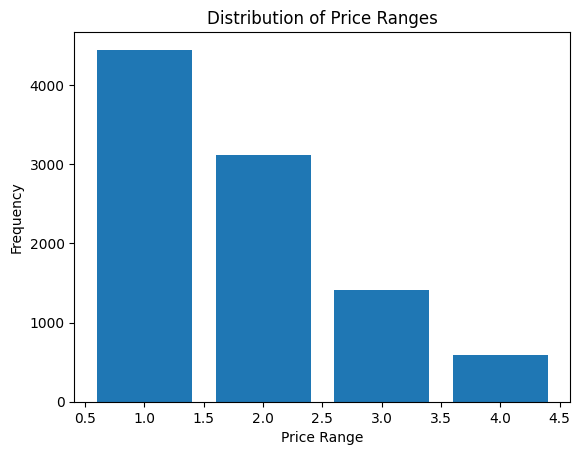

In [58]:
# Level 1 : Task 3 - Price Range Distribution

# 1. Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

price_range_counts = df['Price range'].value_counts()
plt.bar(price_range_counts.index, price_range_counts.values)
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.title('Distribution of Price Ranges')

In [59]:
# 2. Calculate the percentage of restaurants in each price range category.

total_restaurants = len(df)
price_range_percentages = (price_range_counts / total_restaurants) * 100
display(price_range_percentages.round(2))

,count
Price range,
1,46.53
2,32.59
3,14.74
4,6.14


In [60]:
# Level 1 : Task 4 - Online Delivery

# 1. Determine the percentage of restaurants that offer online delivery.

online_delivery_counts = df['Has Online delivery'].value_counts()
total_restaurants = len(df)
online_delivery_percentage = (online_delivery_counts[1] / total_restaurants) * 100
print(online_delivery_percentage.round(2))



25.66


In [61]:
# 2. Compare the average ratings of restaurants with and without online delivery.

delivery_rating = df.groupby('Has Online delivery')['Aggregate rating'].mean()
display(delivery_rating.round(2))

,Aggregate rating
Has Online delivery,
No,2.47
Yes,3.25


Text(0.5, 1.0, 'Distribution of Aggregate Ratings')

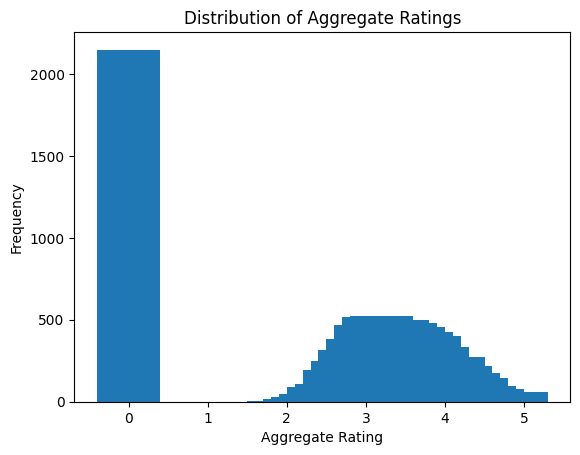

In [62]:
# Level 2 : Task 1- Restaurant Ratings

#1. Analyze the distribution of aggregate ratings and determine the most common rating range.

rating_counts = df['Aggregate rating'].value_counts().sort_index()
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Aggregate Ratings')



In [63]:
# 2. Calculate the average number of votes received by restaurants.

average_votes = df['Votes'].mean()
print(average_votes.round(2))


156.91


In [64]:
## Task 2 : Task: Cuisine Combination

# 1. Identify the most common combinations of cuisines in the dataset.

cuisine_combinations = df['Cleaned_Cuisines'].str.split(', ').explode().value_counts()
display(cuisine_combinations)


,count
Cleaned_Cuisines,
north indian,936
north indian chinese,511
fast fod,354
chinese,354
north indian mughlai,334
...,...
north indian continental chinese italian mexican,1
north indian continental chinese mexican italian desert,1
southern cajun soul fod,1


Text(0.5, 1.0, 'Restaurant Locations on Map')

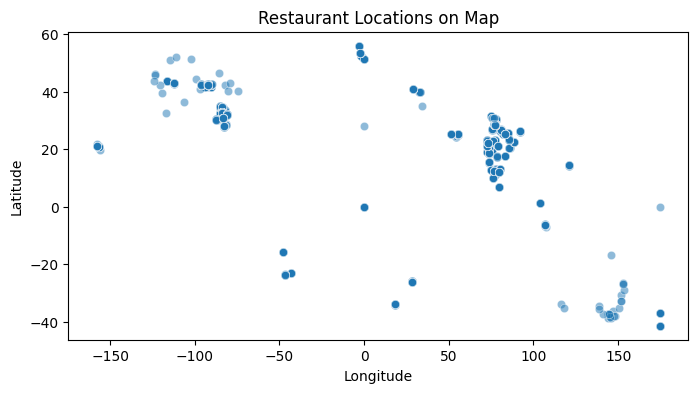

In [65]:
## Task 3 : Geographic Analysis

# 1.Plot the locations of restaurants on a map using longitude and latitude coordinates.

plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='Longitude', y='Latitude', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Restaurant Locations on Map')

Text(0, 0.5, 'Latitude')

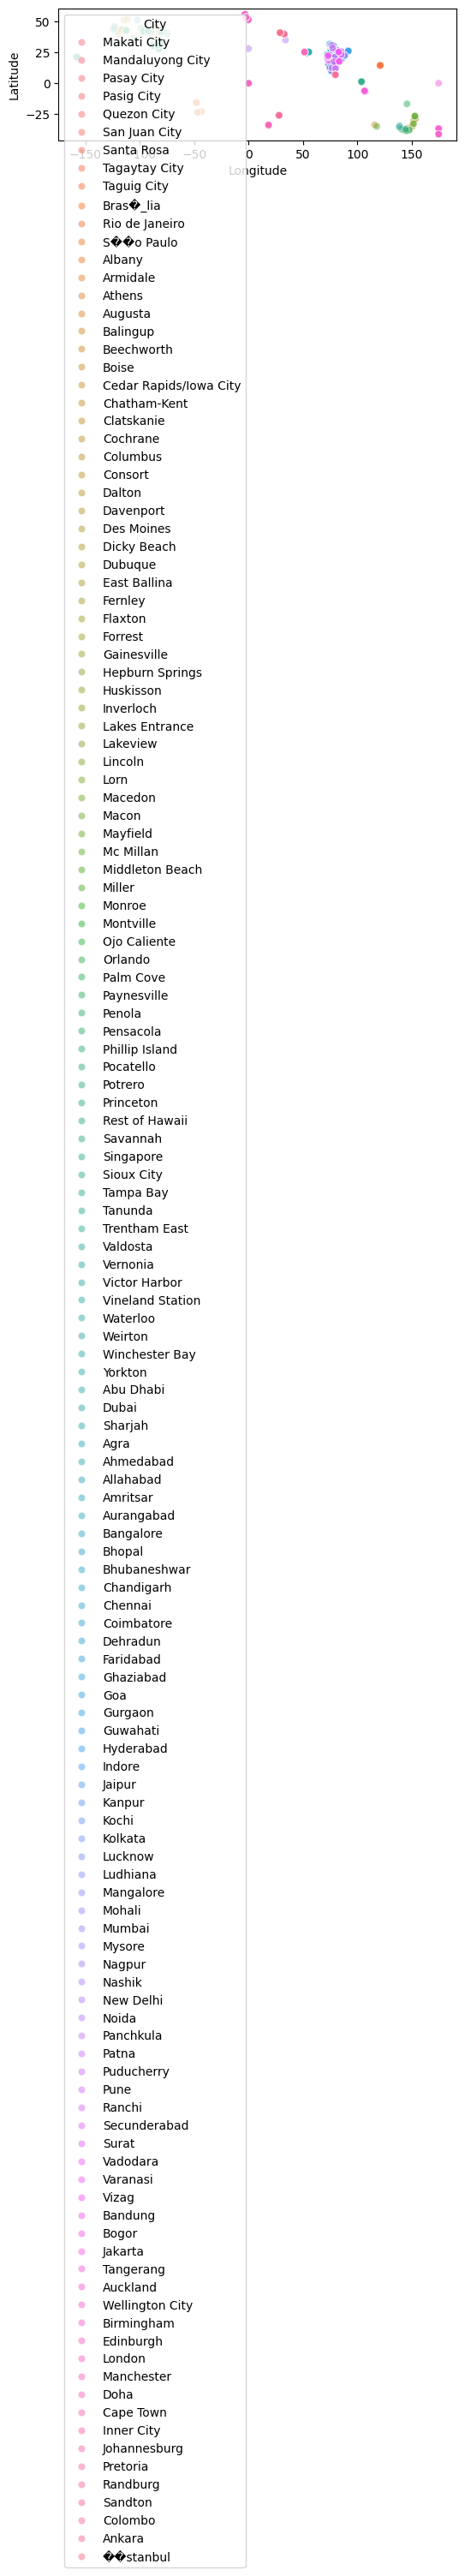

In [66]:
# 3. Identify any patterns or clusters of restaurants in specific areas.

plt.figure(figsize=(6, 2))
sns.scatterplot(data=df, x='Longitude', y='Latitude', alpha=0.5, hue='City')
plt.xlabel('Longitude')
plt.ylabel('Latitude')


In [67]:
## Task 4 : Restaurants Chain

# 1. Identify if there are any restaurant chains present in the dataset.

restaurant_chains = df['Cleaned_Restaurant Name'].value_counts()
restaurant_chains = restaurant_chains[restaurant_chains > 1]
display(restaurant_chains)

,count
Cleaned_Restaurant Name,
cafe cofe day,83
domino piza,79
subway,63
gren chick chop,51
mcdonalds,48
...,...
mithu tiki wala,2
comesum,2
madras dosa chinese,2


In [68]:
  # 2. Analyze the ratings and popularity of different restaurant chains.

chain_ratings = df.groupby('Cleaned_Restaurant Name')['Aggregate rating'].mean()
chain_votes = df.groupby('Cleaned_Restaurant Name')['Votes'].sum()
display(chain_ratings)
display(chain_votes)

,Aggregate rating
Cleaned_Restaurant Name,
,2.871429
ab absolute barbecue,4.833333
ab fast n fod,2.700000
ab kitchen,0.000000
abar khabo,3.600000
...,...
zunzis,4.500000
zure urban kitchen,4.400000
zust yumy,2.300000


,Votes
Cleaned_Restaurant Name,
,622
ab absolute barbecue,16551
ab fast n fod,6
ab kitchen,3
abar khabo,86
...,...
zunzis,796
zure urban kitchen,257
zust yumy,54


In [69]:
## Level 3 : Task 1-  Restaurant Reviews

# 1. Analyze the text reviews to identify the most common positive and negative keywords.

# Task
Analyze text reviews to identify the most common positive and negative keywords, ensuring the results are presented with up to two decimal places. Provide the code for this analysis.

## Preprocess the text reviews

### Subtask:
Clean the text data by removing special characters, numbers, and converting text to lowercase.


**Reasoning**:
Define a function to clean text and apply it to the 'Rating text' column of the DataFrame.



In [70]:
import re

def clean_text(text):
    """Cleans the input text by converting to lowercase, removing special characters and numbers."""
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\d+', '', text)
    return text

df['Cleaned Rating Text'] = df['Rating text'].apply(clean_text)
display(df[['Rating text', 'Cleaned Rating Text']].head())

,Rating text,Cleaned Rating Text
0,Excellent,excellent
1,Excellent,excellent
2,Very Good,very good
3,Excellent,excellent
4,Excellent,excellent


## Perform sentiment analysis

### Subtask:
Use the 'Cleaned Rating Text' column to assign a sentiment label (positive, negative, or neutral) to each review.


**Reasoning**:
Define a function to assign sentiment based on the cleaned rating text and apply it to create a new 'Sentiment' column, then display the relevant columns to check the results.



In [71]:
def get_sentiment(cleaned_text):
    """Assigns sentiment based on cleaned rating text."""
    if 'excellent' in cleaned_text or 'very good' in cleaned_text:
        return 'positive'
    elif 'poor' in cleaned_text or 'not rated' in cleaned_text:
        return 'negative'
    else:
        return 'neutral'

df['Sentiment'] = df['Cleaned Rating Text'].apply(get_sentiment)
display(df[['Rating text', 'Cleaned Rating Text', 'Sentiment']].head())

,Rating text,Cleaned Rating Text,Sentiment
0,Excellent,excellent,positive
1,Excellent,excellent,positive
2,Very Good,very good,positive
3,Excellent,excellent,positive
4,Excellent,excellent,positive


## Identify keywords

### Subtask:
Extract keywords from the preprocessed text, separating them based on the sentiment analysis results.


**Reasoning**:
Separate the 'Cleaned Rating Text' into positive and negative sentiment lists based on the 'Sentiment' column.



In [72]:
positive_reviews = df[df['Sentiment'] == 'positive']['Cleaned Rating Text']
negative_reviews = df[df['Sentiment'] == 'negative']['Cleaned Rating Text']
display(positive_reviews.head())
display(negative_reviews.head())

,Cleaned Rating Text
0,excellent
1,excellent
2,very good
3,excellent
4,excellent


,Cleaned Rating Text
30,not rated
58,not rated
69,not rated
77,not rated
78,not rated


## Analyze keyword frequency

### Subtask:
Count the occurrences of each keyword in the positive and negative review categories.


**Reasoning**:
Count the occurrences of each keyword in the positive and negative review categories by joining the reviews, splitting into words, and using Counter.



In [74]:
from collections import Counter

positive_text = ' '.join(positive_reviews)
negative_text = ' '.join(negative_reviews)

positive_words = positive_text.split()
negative_words = negative_text.split()

positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)

display(positive_word_counts.most_common(10))
display(negative_word_counts.most_common(10))

[('very', 1079), ('good', 1079), ('excellent', 301)]

[('not', 2148), ('rated', 2148), ('poor', 186)]

## Identify most common keywords

### Subtask:
Determine the most frequent positive and negative keywords based on the counts.


**Reasoning**:
Identify the most common positive and negative keywords from the word counts and store them in separate variables.



In [ ]:
top_positive_keywords = [word for word, count in positive_word_counts.most_common(10)]
top_negative_keywords = [word for word, count in negative_word_counts.most_common(10)]

print("Top 10 Positive Keywords:")
print(top_positive_keywords)
print("\nTop 10 Negative Keywords:")
print(top_negative_keywords)

## Visualize the results

### Subtask:
Create visualizations (e.g., word clouds or bar charts) to represent the most common positive and negative keywords.


**Reasoning**:
Generate and display word clouds for the positive and negative keywords to visualize their frequency.



In [ ]:
wordcloud_positive = WordCloud(background_color='white', width=800, height=400).generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Positive Keywords')

wordcloud_negative = WordCloud(background_color='white', width=800, height=400).generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Negative Keywords')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The most frequent words in the positive reviews were 'very', 'good', and 'excellent'.
*   The most frequent words in the negative reviews were 'not', 'rated', and 'poor'.

### Insights or Next Steps

*   Consider incorporating more sophisticated sentiment analysis techniques for potentially more nuanced results.
*   Explore n-grams (sequences of words) to identify common phrases in positive and negative reviews, which could provide more context than single keywords.
